### Classification:
classification is a problem of predicting whether something is one thing or another. There can be multiple things as the options.

Binary classification: two classes and for more than two classes we say multiclass classification.

## 1. Data Preparation

In [193]:
print("Hello")
!nvidia-smi

Hello
Sun Oct  6 10:04:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0              31W /  70W |    159MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+-------------------

In [194]:
import sklearn

In [195]:
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [196]:
len(x), len(y)

(1000, 1000)

In [197]:
x[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [198]:
# Make Dataframe
import pandas as pd

circles = pd.DataFrame({"X1": x[:, 0], "X2": x[:, 1], "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


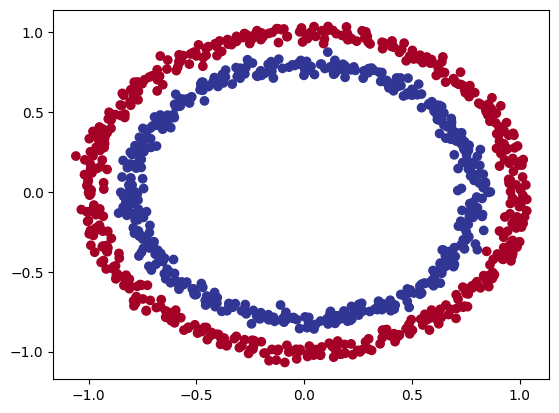

In [199]:
import matplotlib.pyplot as plt

plt.scatter(x=circles["X1"], y=circles["X2"], c=y, cmap=plt.cm.RdYlBu)

The data above is the visualization for our classification between 1 and 0 which is binary classification.

In [200]:
## Input and Output Shapes

x.shape, y.shape

((1000, 2), (1000,))

In [201]:
## represent the data in torch tensor format

import torch

x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [202]:
x.shape

torch.Size([1000, 2])

In [203]:
type(x)

torch.Tensor

In [204]:
## Training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [205]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

### 2. Building a model

In [206]:
import torch
from torch import nn

## make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

#### creating a model

1. Subclass `nn.Module`
2. `nn.Linear()` layer
3. `forward()` method define for computation
4. Instantiate an instance of our model class and send it to the target **device**

In [207]:
class CircleModel_0(nn.Module):
  def __init__(self):
    super().__init__()
    # defining the neural network architecture
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

    # self.two_linear = nn.Sequential(
    #     nn.Linear(in_features=2, out_features=5),
    #     nn.Linear(in_features=5, out_features=1)
    # )

  def forward(self, x):
    # x goes to layer_1 and output of layer_1 goes to layer_2
    return self.layer_2(self.layer_1(x))

    # return self.two_linear(x)


model_0 = CircleModel_0().to(device)
model_0


CircleModel_0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [208]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [209]:
## another method
## Sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [210]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )

  def forward(self, x):
    return self.two_linear_layers(x
    )

model_0 = CircleModelV1().to(device)
model_0

CircleModelV1(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [211]:
## Making prediction with the model

model_0.state_dict()

OrderedDict([('two_linear_layers.0.weight',
              tensor([[0.3017, 0.2749],
                      [0.1405, 0.3472],
                      [0.2997, 0.0313],
                      [0.0749, 0.0540],
                      [0.3773, 0.4750]], device='cuda:0')),
             ('two_linear_layers.0.bias',
              tensor([ 0.5078,  0.4098, -0.1724, -0.0315, -0.1437], device='cuda:0')),
             ('two_linear_layers.1.weight',
              tensor([[ 0.2602,  0.0497,  0.4139,  0.2268, -0.3822]], device='cuda:0')),
             ('two_linear_layers.1.bias', tensor([0.1308], device='cuda:0'))])

In [212]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
untrained_preds[:10]

tensor([[0.1827],
        [0.1961],
        [0.2232],
        [0.1709],
        [0.3431],
        [0.3503],
        [0.2930],
        [0.3294],
        [0.2180],
        [0.1983]], device='cuda:0')

In [213]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

In [214]:
torch.round(untrained_preds[:10])

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

## Loss Function Optimizer


In [215]:
loss_fn_0 = nn.BCELoss() # requires inputs to have gone through the sigmoid activationfunction prior to input to this function

loss_fn_0 = nn.Sequential(
    nn.Sigmoid(),
    nn.BCELoss()
) # to make logit

loss_fn = nn.BCEWithLogitsLoss() # binary cross entropy for binary classification problem wiwth logit is with sigmoid in one single function.

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [216]:
model_0.state_dict()

OrderedDict([('two_linear_layers.0.weight',
              tensor([[0.3017, 0.2749],
                      [0.1405, 0.3472],
                      [0.2997, 0.0313],
                      [0.0749, 0.0540],
                      [0.3773, 0.4750]], device='cuda:0')),
             ('two_linear_layers.0.bias',
              tensor([ 0.5078,  0.4098, -0.1724, -0.0315, -0.1437], device='cuda:0')),
             ('two_linear_layers.1.weight',
              tensor([[ 0.2602,  0.0497,  0.4139,  0.2268, -0.3822]], device='cuda:0')),
             ('two_linear_layers.1.bias', tensor([0.1308], device='cuda:0'))])

In [217]:
## Calculate accuracy

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

### 3. Training model
Build a training loop
1. Forward Propagation
2. Calculate loss
3. Optimizer zero grad
4. Backprogation
5. Gradient Descent

In [218]:
# view the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits[:5], y_test[:5]

(tensor([[0.1827],
         [0.1961],
         [0.2232],
         [0.1709],
         [0.3431]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.]))

In [219]:
## using sigmoid activation function

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.5455],
        [0.5489],
        [0.5556],
        [0.5426],
        [0.5849]], device='cuda:0')

In [220]:
torch.round(y_pred_probs)[:10]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

decision boundary

`y_pred_probs >= 0.5 ` `y=1` (class 1)
else class 0

In [221]:
y_preds = torch.round(y_pred_probs)
y_preds[:10]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

### 3. Building training and testing loop

In [222]:
torch.manual_seed(2)
torch.cuda.manual_seed(2)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  # forward prop
  y_logits = model_0(X_train).squeeze() # get rid of extra dim
  y_pred = torch.round(torch.sigmoid(y_logits)) # pred prob into pred label

  # calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), y_train) # for BCE expect pred probability
  loss = loss_fn(y_logits, y_train) # BCE with logit expect logit
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # optimizer
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # gradient descent (optimizer step)
  optimizer.step()

  # testing
  model_0.eval() # turn off gradient tracking
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70237 | Acc: 50.00% | Test Loss: 0.70119 | Test Acc: 50.00%
Epoch: 10 | Loss: 0.70162 | Acc: 50.00% | Test Loss: 0.70043 | Test Acc: 50.00%
Epoch: 20 | Loss: 0.70093 | Acc: 50.00% | Test Loss: 0.69975 | Test Acc: 50.00%
Epoch: 30 | Loss: 0.70031 | Acc: 50.00% | Test Loss: 0.69913 | Test Acc: 50.00%
Epoch: 40 | Loss: 0.69974 | Acc: 50.00% | Test Loss: 0.69857 | Test Acc: 50.00%
Epoch: 50 | Loss: 0.69922 | Acc: 50.00% | Test Loss: 0.69806 | Test Acc: 50.00%
Epoch: 60 | Loss: 0.69875 | Acc: 50.00% | Test Loss: 0.69759 | Test Acc: 50.00%
Epoch: 70 | Loss: 0.69832 | Acc: 50.00% | Test Loss: 0.69717 | Test Acc: 50.00%
Epoch: 80 | Loss: 0.69793 | Acc: 50.00% | Test Loss: 0.69679 | Test Acc: 50.00%
Epoch: 90 | Loss: 0.69758 | Acc: 50.00% | Test Loss: 0.69644 | Test Acc: 50.00%
Epoch: 100 | Loss: 0.69725 | Acc: 50.00% | Test Loss: 0.69612 | Test Acc: 50.00%
Epoch: 110 | Loss: 0.69695 | Acc: 50.00% | Test Loss: 0.69583 | Test Acc: 50.00%
Epoch: 120 | Loss: 0.69668 | Acc: 50.00

### predicting with model

In [223]:
import requests
from pathlib import Path

# helper function
request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

with open("helper_functions.py", "wb") as f:
  f.write(request.content)

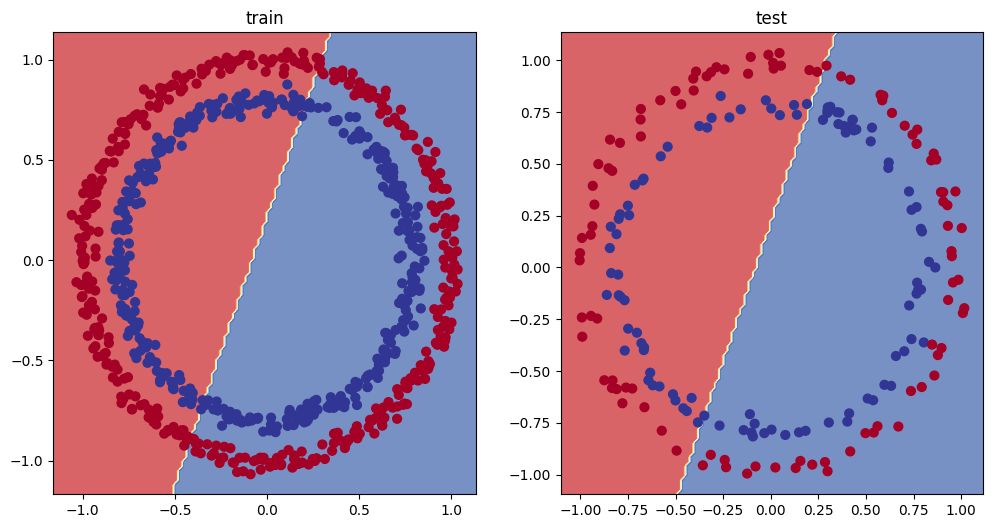

In [224]:
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)

### Improving model

In [228]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z

model_1 = CircleModelV2().to(device)
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [230]:
## loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    params=model_1.parameters(),
    lr=0.1
)

In [231]:
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 20 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | accuracy: {acc}")

Epoch: 0 | Loss: 0.6998394727706909 | accuracy: 50.0
Epoch: 20 | Loss: 0.6939228773117065 | accuracy: 50.625
Epoch: 40 | Loss: 0.6934729814529419 | accuracy: 49.625
Epoch: 60 | Loss: 0.6932594180107117 | accuracy: 50.125
Epoch: 80 | Loss: 0.6931397318840027 | accuracy: 50.375
Epoch: 100 | Loss: 0.693071722984314 | accuracy: 50.5
Epoch: 120 | Loss: 0.6930328011512756 | accuracy: 50.625
Epoch: 140 | Loss: 0.6930104494094849 | accuracy: 50.875
Epoch: 160 | Loss: 0.6929975748062134 | accuracy: 50.625
Epoch: 180 | Loss: 0.6929901838302612 | accuracy: 51.0
Epoch: 200 | Loss: 0.6929858326911926 | accuracy: 50.875
Epoch: 220 | Loss: 0.6929833889007568 | accuracy: 51.5
Epoch: 240 | Loss: 0.6929818391799927 | accuracy: 51.37500000000001
Epoch: 260 | Loss: 0.6929810047149658 | accuracy: 51.0
Epoch: 280 | Loss: 0.6929805874824524 | accuracy: 51.0
Epoch: 300 | Loss: 0.6929802298545837 | accuracy: 51.37500000000001
Epoch: 320 | Loss: 0.6929801106452942 | accuracy: 51.37500000000001
Epoch: 340 | Loss

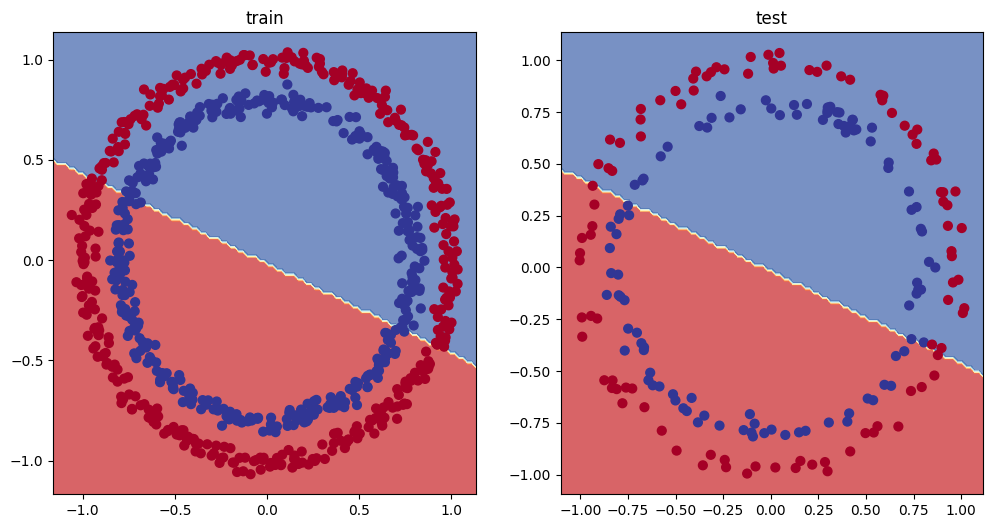

In [232]:
# plot the decision boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1, X_test, y_test)

Our data is non linear so we need to make our model learn on these data.

### If our data can fit linear data.

In [237]:
weight = 0.7
bias = 0.3

X_regression = torch.arange(0, 10, 0.1).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

train_split = int(0.8 * len(X_regression))
X_train, y_train = X_regression[:train_split], y_regression[:train_split]
X_test, y_test = X_regression[train_split:], y_regression[train_split:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([80, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

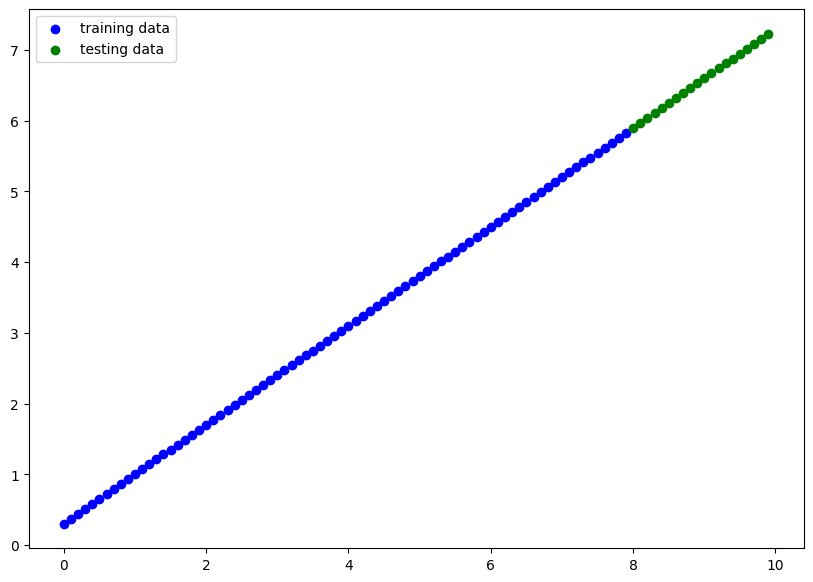

In [238]:
## Visualizing the data

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="training data")
plt.scatter(X_test, y_test, c="g", label="testing data")
plt.legend()

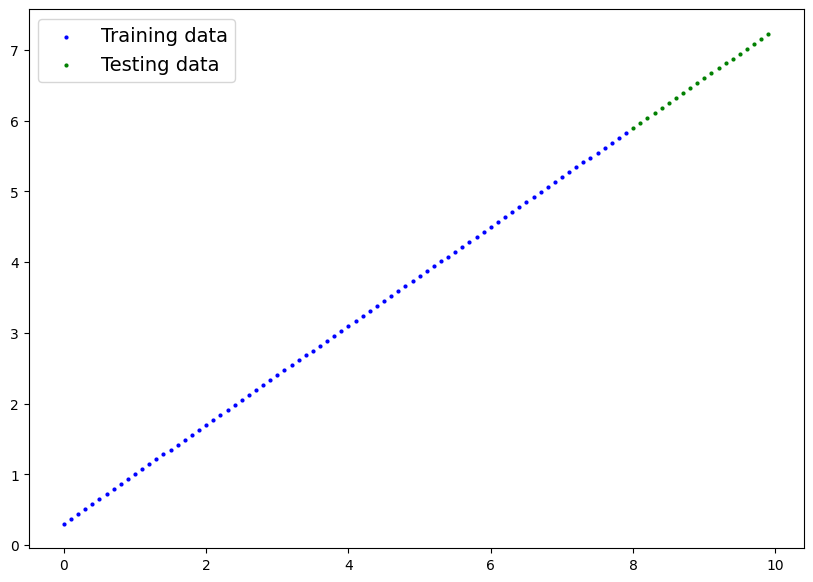

In [239]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None
)

In [240]:
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [241]:
## same architecture but for out linear data input shape change

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2


Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [242]:
## loss function and optimizer

loss_fn = nn.L1Loss() # MAE loss function
optimizer = torch.optim.SGD(
    params=model_2.parameters(),
    lr=0.01
)

epochs = 1000

X_train_regression, y_train_regression = X_train.to(device), y_train.to(device)
X_test_regression, y_test_regression = X_test.to(device), y_test.to(device)

In [245]:
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 2.314953327178955 | Test Loss: 4.237895965576172
Epoch: 100 | Loss: 0.10308048874139786 | Test Loss: 0.9143751263618469
Epoch: 200 | Loss: 0.3520268499851227 | Test Loss: 0.20828497409820557
Epoch: 300 | Loss: 0.2577122449874878 | Test Loss: 0.49998387694358826
Epoch: 400 | Loss: 0.029222508892416954 | Test Loss: 0.8868589401245117
Epoch: 500 | Loss: 0.10780894011259079 | Test Loss: 0.7076683640480042
Epoch: 600 | Loss: 0.39276495575904846 | Test Loss: 0.042533304542303085
Epoch: 700 | Loss: 0.2693336009979248 | Test Loss: 0.3659988343715668
Epoch: 800 | Loss: 0.2307470589876175 | Test Loss: 0.41113153100013733
Epoch: 900 | Loss: 0.0685366615653038 | Test Loss: 0.689670979976654


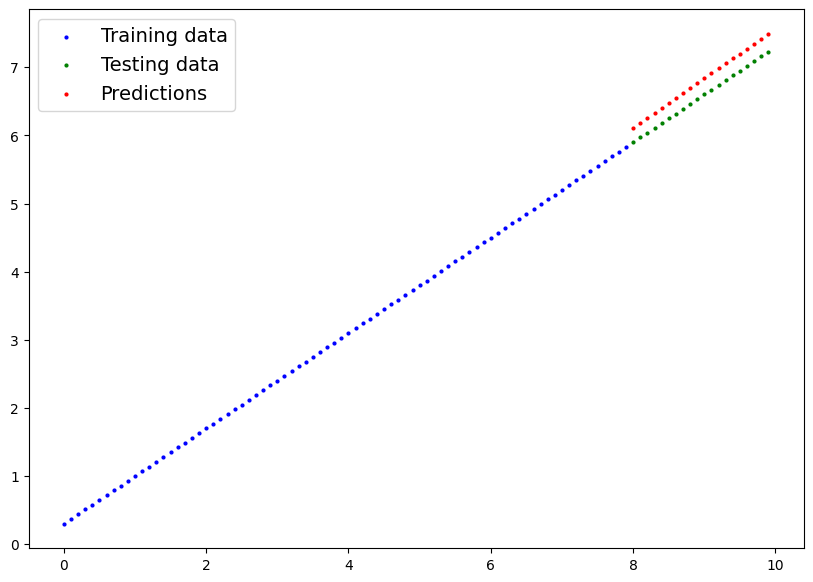

In [249]:
## Evaluate

model_2.eval() # turn off gradient tracking

with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# need to convert the tensor to numpy
plot_predictions(
    train_data=X_train_regression.cpu(),
    train_labels=y_train_regression.cpu(),
    test_data=X_test_regression.cpu(),
    test_labels=y_test_regression.cpu(),
    predictions=y_preds.cpu()
)